In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
links = pd.read_csv("links.csv")
movies = pd.read_csv('movies.csv')
rating = pd.read_csv('ratings.csv')
tag = pd.read_csv('tags.csv')

In [3]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [5]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [6]:
tag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [7]:
links


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [8]:
movies


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [9]:
rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [10]:
tag

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [11]:
len(rating['userId'].unique())

610

In [12]:
max_rated_movie = rating['movieId'].value_counts().idxmax()
max_rated_movie_title = movies.loc[movies['movieId'] == max_rated_movie, 'title'].values[0]

print(f"The movie with the maximum number of user ratings is: {max_rated_movie_title}")


The movie with the maximum number of user ratings is: Forrest Gump (1994)


In [13]:
merged_data = pd.merge(tag, movies, on='movieId')

matrix_tags = merged_data.loc[merged_data['title'] == 'Matrix, The (1999)', 'tag']

print(f"Tags for 'Matrix, The (1999)':\n{matrix_tags}")



Tags for 'Matrix, The (1999)':
1270          martial arts
1271                sci-fi
1272    alternate universe
1273            philosophy
1274      post apocalyptic
Name: tag, dtype: object


In [14]:
merged_data = pd.merge(rating, movies, on='movieId')
terminator2_ratings = merged_data.loc[merged_data['title'] == 'Terminator 2: Judgment Day (1991)', 'rating']
average_rating = terminator2_ratings.mean()

print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is: {average_rating}")


The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.970982142857143


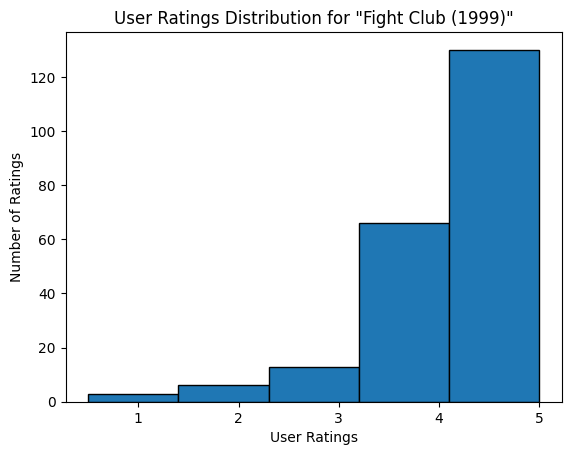

In [15]:
merged_data = pd.merge(rating, movies, on='movieId')

fight_club_ratings = merged_data.loc[merged_data['title'] == 'Fight Club (1999)', 'rating']

plt.hist(fight_club_ratings, bins=5, edgecolor='black')
plt.title('User Ratings Distribution for "Fight Club (1999)"')
plt.xlabel('User Ratings')
plt.ylabel('Number of Ratings')
plt.show()


In [16]:
grouped_ratings = rating.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
print("Grouped Ratings:")
print(grouped_ratings)


Grouped Ratings:
      movieId  count      mean
0           1    215  3.920930
1           2    110  3.431818
2           3     52  3.259615
3           4      7  2.357143
4           5     49  3.071429
...       ...    ...       ...
9719   193581      1  4.000000
9720   193583      1  3.500000
9721   193585      1  3.500000
9722   193587      1  3.500000
9723   193609      1  4.000000

[9724 rows x 3 columns]


In [17]:
merged_data = pd.merge(movies,grouped_ratings, on='movieId', how='inner')
print(merged_data)


      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9719   193581  Black Butler: Book of the Atlantic (2017)   
9720   193583               No Game No Life: Zero (2017)   
9721   193585                               Flint (2017)   
9722   193587        Bungo Stray Dogs: Dead Apple (2018)   
9723   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  count      mean  
0     Adventure|Animation|Children|Comedy|Fantasy    215  3.920930  
1                      Adventure|Children|Fantasy    110  3.431818  
2                                  Comedy|Romance     52  3.259615  
3  

In [18]:
filtered_movies = merged_data[merged_data['count'] > 50]

print("\nFiltered Movies with More Than 50 Ratings:")
print(filtered_movies.head())



Filtered Movies with More Than 50 Ratings:
   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  count      mean  
0  Adventure|Animation|Children|Comedy|Fantasy    215  3.920930  
1                   Adventure|Children|Fantasy    110  3.431818  
2                               Comedy|Romance     52  3.259615  
5                        Action|Crime|Thriller    102  3.946078  
6                               Comedy|Romance     54  3.185185  


In [19]:
most_popular_movie = filtered_movies.sort_values(by='mean', ascending=False).iloc[0]

print("Most Popular Movie Based on Average User Ratings:")
print(most_popular_movie[['title', 'genres', 'mean']])


Most Popular Movie Based on Average User Ratings:
title     Shawshank Redemption, The (1994)
genres                         Crime|Drama
mean                              4.429022
Name: 277, dtype: object


In [20]:
top_5_popular_movies = filtered_movies.sort_values(by='count', ascending=False).head(5)
print("Top 5 Popular Movies Based on Number of User Ratings:")
print(top_5_popular_movies[['title', 'genres', 'count']])


Top 5 Popular Movies Based on Number of User Ratings:
                                 title                       genres  count
314                Forrest Gump (1994)     Comedy|Drama|Romance|War    329
277   Shawshank Redemption, The (1994)                  Crime|Drama    317
257                Pulp Fiction (1994)  Comedy|Crime|Drama|Thriller    307
510   Silence of the Lambs, The (1991)        Crime|Horror|Thriller    279
1938                Matrix, The (1999)       Action|Sci-Fi|Thriller    278


In [21]:
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]

third_most_popular_sci_fi_movie = sci_fi_movies.sort_values(by='count', ascending=False).iloc[2]
print("Third Most Popular Sci-Fi Movie Based on Number of User Ratings:")
print(third_most_popular_sci_fi_movie[['title', 'genres', 'count']])


Third Most Popular Sci-Fi Movie Based on Number of User Ratings:
title                 Jurassic Park (1993)
genres    Action|Adventure|Sci-Fi|Thriller
count                                  238
Name: 418, dtype: object


In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from time import sleep
from requests.exceptions import RequestException

IMDB_BASE_URL = "https://www.imdb.com/title/"
HEADERS = {'User-Agent': 'Mozilla/5.0'}
REVIEWS_DICT = {}

REQUEST_LIMIT = 10
REQUEST_PERIOD = 1  

def get_review(imdb_id):
    url = f"{IMDB_BASE_URL}tt{imdb_id}/reviews"

    try:
        response = requests.get(url, headers=HEADERS, timeout=5)
        response.raise_for_status()
    except RequestException as e:
        print(f"Error fetching {url}: {e}")
        return None

    soup = BeautifulSoup(response.text, 'html.parser')
    review = soup.find('div', class_='text show-more__control')
    return review.text.strip() if review else None


for index, row in filtered_movies.iterrows():
    movie_id = row['movieId']
    imdb_id = links.loc[links['movieId'] == movie_id, 'imdbId'].values[0]

    review = get_review(imdb_id)
    if review:
        REVIEWS_DICT[imdb_id] = review


reviews_df = pd.DataFrame.from_dict(REVIEWS_DICT, orient='index', columns=['review'])




Error fetching https://www.imdb.com/title/tt114709/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt114709/reviews
Error fetching https://www.imdb.com/title/tt113497/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt113497/reviews
Error fetching https://www.imdb.com/title/tt113228/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt113228/reviews
Error fetching https://www.imdb.com/title/tt113277/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt113277/reviews
Error fetching https://www.imdb.com/title/tt114319/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt114319/reviews
Error fetching https://www.imdb.com/title/tt113189/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt113189/reviews
Error fetching https://www.imdb.com/title/tt112346/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt112346/reviews
Error fetching https://www.imdb.com/title/tt112641/reviews: 404 Client Error

Error fetching https://www.imdb.com/title/tt110357/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt110357/reviews
Error fetching https://www.imdb.com/title/tt110475/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt110475/reviews
Error fetching https://www.imdb.com/title/tt110478/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt110478/reviews
Error fetching https://www.imdb.com/title/tt110622/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt110622/reviews
Error fetching https://www.imdb.com/title/tt111257/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt111257/reviews
Error fetching https://www.imdb.com/title/tt111503/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt111503/reviews
Error fetching https://www.imdb.com/title/tt106220/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt106220/reviews
Error fetching https://www.imdb.com/title/tt109254/reviews: 404 Client Error

Error fetching https://www.imdb.com/title/tt58331/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt58331/reviews
Error fetching https://www.imdb.com/title/tt59742/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt59742/reviews
Error fetching https://www.imdb.com/title/tt95016/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt95016/reviews
Error fetching https://www.imdb.com/title/tt67992/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt67992/reviews
Error fetching https://www.imdb.com/title/tt95159/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt95159/reviews
Error fetching https://www.imdb.com/title/tt79470/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt79470/reviews
Error fetching https://www.imdb.com/title/tt105236/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt105236/reviews
Error fetching https://www.imdb.com/title/tt91763/reviews: 404 Client Error:  for url: h

Error fetching https://www.imdb.com/title/tt119229/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt119229/reviews
Error fetching https://www.imdb.com/title/tt118655/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt118655/reviews
Error fetching https://www.imdb.com/title/tt119116/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt119116/reviews
Error fetching https://www.imdb.com/title/tt119567/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt119567/reviews
Error fetching https://www.imdb.com/title/tt118880/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt118880/reviews
Error fetching https://www.imdb.com/title/tt119094/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt119094/reviews
Error fetching https://www.imdb.com/title/tt119654/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt119654/reviews
Error fetching https://www.imdb.com/title/tt118884/reviews: 404 Client Error

Error fetching https://www.imdb.com/title/tt120915/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt120915/reviews
Error fetching https://www.imdb.com/title/tt78346/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt78346/reviews
Error fetching https://www.imdb.com/title/tt73629/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt73629/reviews
Error fetching https://www.imdb.com/title/tt125439/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt125439/reviews
Error fetching https://www.imdb.com/title/tt145660/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt145660/reviews
Error fetching https://www.imdb.com/title/tt130827/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt130827/reviews
Error fetching https://www.imdb.com/title/tt99052/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt99052/reviews
Error fetching https://www.imdb.com/title/tt158983/reviews: 404 Client Error:  for

Error fetching https://www.imdb.com/title/tt243155/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt243155/reviews
Error fetching https://www.imdb.com/title/tt86250/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt86250/reviews
Error fetching https://www.imdb.com/title/tt126029/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt126029/reviews
Error fetching https://www.imdb.com/title/tt203009/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt203009/reviews
Error fetching https://www.imdb.com/title/tt212720/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt212720/reviews
Error fetching https://www.imdb.com/title/tt250494/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt250494/reviews
Error fetching https://www.imdb.com/title/tt230600/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt230600/reviews
Error fetching https://www.imdb.com/title/tt139654/reviews: 404 Client Error: 

Error fetching https://www.imdb.com/title/tt121766/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt121766/reviews
Error fetching https://www.imdb.com/title/tt356910/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt356910/reviews
Error fetching https://www.imdb.com/title/tt372784/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt372784/reviews
Error fetching https://www.imdb.com/title/tt396269/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt396269/reviews
Error fetching https://www.imdb.com/title/tt405422/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt405422/reviews
Error fetching https://www.imdb.com/title/tt330373/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt330373/reviews
Error fetching https://www.imdb.com/title/tt363771/reviews: 404 Client Error:  for url: https://www.imdb.com/title/tt363771/reviews
Error fetching https://www.imdb.com/title/tt434409/reviews: 404 Client Error

In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from time import sleep
from requests.exceptions import RequestException

url = "https://www.imdb.com/title/"

In [28]:
request = requests.get(url)
request

<Response [404]>

In [29]:
request.content

b'\n<!DOCTYPE html>\n<html lang="en">\n<head>\n  <meta charset="utf-8" />\n  <title>404 Error - IMDb</title>\n  <style>\nhtml, body {\n  height: 100%;\n}\nbody {\n  margin: auto;\n  width: 1008px;\n  background-color: #D4D9DD;\n  font-family: Verdana, Arial, sans-serif;\n}\na {\n  text-decoration: none;\n}\na:hover {\n  text-decoration: underline;\n}\na:link, a:hover, a:visited {\n  color: #136CB2;\n}\na:active {\n  color: #E7BE00;\n}\n#error {\n  height: 100%;\n  background-color: white;\n  border-left: 1px solid #999999;\n  border-right: 1px solid #999999;\n  box-shadow: 0 0 5px 5px #C5CACD;\n}\n.error_message {\n  color: #999999;\n  font-size: 17.5px;\n  padding: 30px 70px 20px;\n}\n.error_bubble {\n  font-family: Arial, helvetica, sans-serif;\n  font-weight: bold;\n  border-radius: 8px;\n  -moz-border-radius: 8px;\n  margin: 0 70px 0 70px;\n  padding: 50px;\n}\n.error_bubble div {\n  display: inline-block;\n  vertical-align: middle;\n}\n.error_quote {\n  color: #FFFFFF;\n  font-siz

In [38]:
pages = BeautifulSoup(request.content, "html.parser")
print(pages.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   404 Error - IMDb
  </title>
  <style>
   html, body {
  height: 100%;
}
body {
  margin: auto;
  width: 1008px;
  background-color: #D4D9DD;
  font-family: Verdana, Arial, sans-serif;
}
a {
  text-decoration: none;
}
a:hover {
  text-decoration: underline;
}
a:link, a:hover, a:visited {
  color: #136CB2;
}
a:active {
  color: #E7BE00;
}
#error {
  height: 100%;
  background-color: white;
  border-left: 1px solid #999999;
  border-right: 1px solid #999999;
  box-shadow: 0 0 5px 5px #C5CACD;
}
.error_message {
  color: #999999;
  font-size: 17.5px;
  padding: 30px 70px 20px;
}
.error_bubble {
  font-family: Arial, helvetica, sans-serif;
  font-weight: bold;
  border-radius: 8px;
  -moz-border-radius: 8px;
  margin: 0 70px 0 70px;
  padding: 50px;
}
.error_bubble div {
  display: inline-block;
  vertical-align: middle;
}
.error_quote {
  color: #FFFFFF;
  font-size: 30px;
  line-height: 1.35em;
  padding-left:

In [40]:
scraped_movies = pages.find_all('td', class_='titleColumn')
scraped_movies


[]